/tmp/ipykernel_226642/2525305888.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ModuleNotFoundError: No module named 'mayavi'

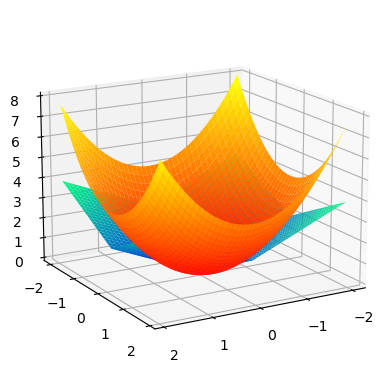

In [2]:
# generate data
import numpy as np

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
mx, my = np.meshgrid(x, y, indexing='ij')
mz1 = np.abs(mx) + np.abs(my)
mz2 = mx ** 2 + my ** 2

def v1_matplotlib():
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf1 = ax.plot_surface(mx, my, mz1, cmap='winter')
    surf2 = ax.plot_surface(mx, my, mz2, cmap='autumn')
    ax.view_init(azim=60, elev=16)
    fig.show()


def v2_mayavi(transparency):
    from mayavi import mlab
    fig = mlab.figure()

    ax_ranges = [-2, 2, -2, 2, 0, 8]
    ax_scale = [1.0, 1.0, 0.4]
    ax_extent = ax_ranges * np.repeat(ax_scale, 2)

    surf3 = mlab.surf(mx, my, mz1, colormap='Blues')
    surf4 = mlab.surf(mx, my, mz2, colormap='Oranges')

    surf3.actor.actor.scale = ax_scale
    surf4.actor.actor.scale = ax_scale
    mlab.view(60, 74, 17, [-2.5, -4.6, -0.3])
    mlab.outline(surf3, color=(.7, .7, .7), extent=ax_extent)
    mlab.axes(surf3, color=(.7, .7, .7), extent=ax_extent,
              ranges=ax_ranges,
              xlabel='x', ylabel='y', zlabel='z')

    if transparency:
        surf3.actor.property.opacity = 0.5
        surf4.actor.property.opacity = 0.5
        fig.scene.renderer.use_depth_peeling = 1


v1_matplotlib()
v2_mayavi(False)
v2_mayavi(True)

# To install mayavi, the following currently works for me (Windows 10):
#
#   conda create --name mayavi_test_py2 python=2.7 matplotlib mayavi=4.4.0
#    (installs pyqt=4.10.4 mayavi=4.4.0 vtk=5.10.1)
#    * the `use_depth_peeling=1` got no effect. Transparency is not correct.
#    * requires `import pyface.qt` or similar workaround
#
# or
#
#   conda create --name mayavi_test_py3 python=3.6 matplotlib
#   conda activate mayavi_test_py3
#   pip install mayavi